### Data Analysis
* City temperatures increase as the latitudes approach the equator.
* City humidity is not correlated with latitude as there are cities with high and low humidities across latitudes.
* City cloudiness is not correlated with latitude as there are cities with high and low humidities across latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code   
    city_code = f"{city}, {country}"
    
    # If the city is unique, then add it to a our cities list
    if city_code not in cities:
        cities.append(city_code)

# Print the city count to confirm sufficient count
print(len(cities))

601


## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Initialize empty lists
city_data = []
lat = []
temperature = []  # Temperature (F)
humidity = []  # Humidity (%)
cloudiness = []  # Cloudiness (%)
wind_speed = []  # Wind Speed (mph)

for i in np.arange(len(cities)):
    # GET request for each city
    print(f"Processing city #{i} | {cities[i]}")
    print(f"{url}&q={cities[i]}")
    call = requests.get(f"{url}&q={cities[i]}")
    
    # Check status of GET request, skip 404's
    if (call.status_code == 404):
        print(f"{cities[i]} not found on OpenWeatherMap. Skipping...")
        continue
    
    # Convert to json object
    call = call.json()
    
    # Populate lists with desired data
    city_data.append(cities[i])
    lat.append(call['coord']['lat'])
    temperature.append(call['main']['temp'])
    humidity.append(call['main']['humidity'])
    cloudiness.append(call['clouds']['all'])
    wind_speed.append(call['wind']['speed'])

# Create Data Frame
weather_data = pd.DataFrame({"City": city_data,
                            "Latitude": lat,
                            "Temperature (F)": temperature,
                            "Humidity (%)": humidity,
                            "Cloudiness (%)": cloudiness,
                            "Wind Speed (mph)": wind_speed})

# Save Data Frame as .csv
weather_data.to_csv("./Weather_Data.csv", index = False)

Processing city #0 | puerto ayora, ec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=puerto ayora, ec
Processing city #1 | rikitea, pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=rikitea, pf
Processing city #2 | sishui, cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=sishui, cn
Processing city #3 | mogadishu, so
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=mogadishu, so
Processing city #4 | college, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=college, us
Processing city #5 | bodrum, tr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=bodrum, tr
Processing city #6 | nakambala, zm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing city #52 | utiroa, ki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=utiroa, ki
utiroa, ki not found on OpenWeatherMap. Skipping...
Processing city #53 | georgetown, sh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=georgetown, sh
Processing city #54 | poso, id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=poso, id
Processing city #55 | kapaa, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=kapaa, us
Processing city #56 | shaoguan, cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=shaoguan, cn
Processing city #57 | bluff, nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=bluff, nz
Processing city #58 | flinders, au
http://api.openweathermap.o

Processing city #104 | plettenberg bay, za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=plettenberg bay, za
Processing city #105 | rock springs, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=rock springs, us
Processing city #106 | port hardy, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=port hardy, ca
Processing city #107 | neuquen, ar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=neuquen, ar
Processing city #108 | riviere-au-renard, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=riviere-au-renard, ca
Processing city #109 | bud, no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=bud, no
Processing city #110 | pierre, us
http://api.openweather

Processing city #156 | mandalgovi, mn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=mandalgovi, mn
Processing city #157 | faanui, pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=faanui, pf
Processing city #158 | indianola, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=indianola, us
Processing city #159 | avarua, ck
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=avarua, ck
Processing city #160 | trairi, br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=trairi, br
Processing city #161 | tarasovskiy, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=tarasovskiy, ru
Processing city #162 | ribeira grande, pt
http://api.openweathermap.org/data/2.5/weather

Processing city #209 | leova, md
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=leova, md
Processing city #210 | ulaangom, mn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=ulaangom, mn
Processing city #211 | ponta do sol, cv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=ponta do sol, cv
Processing city #212 | binzhou, cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=binzhou, cn
Processing city #213 | vestmannaeyjar, is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=vestmannaeyjar, is
Processing city #214 | karratha, au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=karratha, au
Processing city #215 | santa maria, cv
http://api.openweathermap.org/data/2.

Processing city #260 | nakamura, jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=nakamura, jp
Processing city #261 | vitim, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=vitim, ru
Processing city #262 | umzimvubu, za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=umzimvubu, za
umzimvubu, za not found on OpenWeatherMap. Skipping...
Processing city #263 | teguise, es
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=teguise, es
Processing city #264 | qabis, tn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=qabis, tn
qabis, tn not found on OpenWeatherMap. Skipping...
Processing city #265 | aksha, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=aksha, ru


Processing city #312 | tsihombe, mg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=tsihombe, mg
tsihombe, mg not found on OpenWeatherMap. Skipping...
Processing city #313 | nelson bay, au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=nelson bay, au
Processing city #314 | sakakah, sa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=sakakah, sa
sakakah, sa not found on OpenWeatherMap. Skipping...
Processing city #315 | hambantota, lk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=hambantota, lk
Processing city #316 | sheltozero, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=sheltozero, ru
Processing city #317 | palabuhanratu, id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca246

Processing city #364 | moctezuma, mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=moctezuma, mx
Processing city #365 | vostok, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=vostok, ru
Processing city #366 | banmo, mm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=banmo, mm
banmo, mm not found on OpenWeatherMap. Skipping...
Processing city #367 | eureka, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=eureka, us
Processing city #368 | shieli, kz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=shieli, kz
Processing city #369 | yumbel, cl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=yumbel, cl
Processing city #370 | svetlyy, ru
http://api.openweather

Processing city #418 | maghama, mr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=maghama, mr
maghama, mr not found on OpenWeatherMap. Skipping...
Processing city #419 | redwater, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=redwater, ca
Processing city #420 | roald, no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=roald, no
Processing city #421 | tecolutla, mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=tecolutla, mx
Processing city #422 | mecca, sa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=mecca, sa
Processing city #423 | khonuu, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=khonuu, ru
khonuu, ru not found on OpenWeatherMap. Skipping...

Processing city #471 | batemans bay, au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=batemans bay, au
Processing city #472 | sotnikovo, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=sotnikovo, ru
Processing city #473 | rizhao, cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=rizhao, cn
Processing city #474 | linchuan, cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=linchuan, cn
linchuan, cn not found on OpenWeatherMap. Skipping...
Processing city #475 | sioux lookout, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=sioux lookout, ca
Processing city #476 | mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=mahebourg, mu
Processing city 

Processing city #522 | ferme-neuve, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=ferme-neuve, ca
Processing city #523 | stokmarknes, no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=stokmarknes, no
Processing city #524 | muisne, ec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=muisne, ec
Processing city #525 | lamar, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=lamar, us
Processing city #526 | ranaghat, in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=ranaghat, in
Processing city #527 | pacific grove, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=pacific grove, us
Processing city #528 | turukhansk, ru
http://api.openweathermap.org/data/2.5

Processing city #574 | sao raimundo das mangabeiras, br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=sao raimundo das mangabeiras, br
Processing city #575 | acajutla, sv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=acajutla, sv
Processing city #576 | laksham, bd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=laksham, bd
Processing city #577 | santa cruz cabralia, br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=santa cruz cabralia, br
Processing city #578 | carauari, br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=carauari, br
Processing city #579 | mizdah, ly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a0226a28ca24691e2847dda0ca3ed1e&q=mizdah, ly
Processing city #580 | witu, ke


In [11]:
print(weather_data.count())
weather_data.head()

City                530
Latitude            530
Longitude           530
Temperature (F)     530
Humidity (%)        530
Cloudiness (%)      530
Wind Speed (mps)    530
dtype: int64


,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mps)
0,"puerto ayora, ec",-0.74,-90.35,78.80,61,75,19.46
1,"rikitea, pf",-23.12,-134.97,74.83,96,0,15.35
2,"sishui, cn",35.66,117.27,76.81,89,44,9.42
3,"mogadishu, so",2.04,45.34,76.81,99,68,19.04
4,"college, us",64.86,-147.80,49.46,87,90,4.70


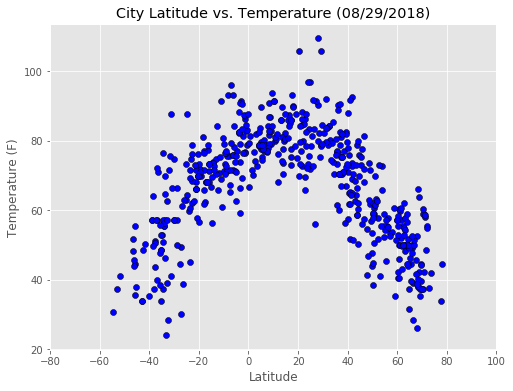

In [105]:
# Graph Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(weather_data["Latitude"],
           weather_data["Temperature (F)"],
           marker = "o",
           facecolors = "blue",
           edgecolors = "black")

plt.xlim(-80, 100)
plt.title("City Latitude vs. Temperature (08/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')

plt.savefig("./Images/Temperature.png")

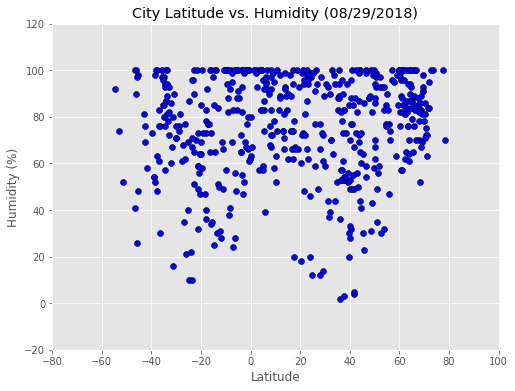

In [99]:
# Graph Humidity (%) vs. Latitude
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(weather_data["Latitude"],
           weather_data["Humidity (%)"],
           marker = "o",
           facecolors = "blue",
           edgecolors = "black")

plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.title("City Latitude vs. Humidity (08/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')

plt.savefig("./Images/Humidity.png")

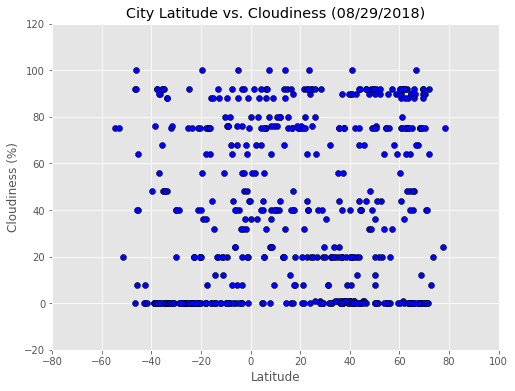

In [100]:
# Graph Cloudiness (%) vs. Latitude
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(weather_data["Latitude"],
           weather_data["Cloudiness (%)"],
           marker = "o",
           facecolors = "blue",
           edgecolors = "black")

plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.title("City Latitude vs. Cloudiness (08/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')

plt.savefig("./Images/Cloudiness.png")

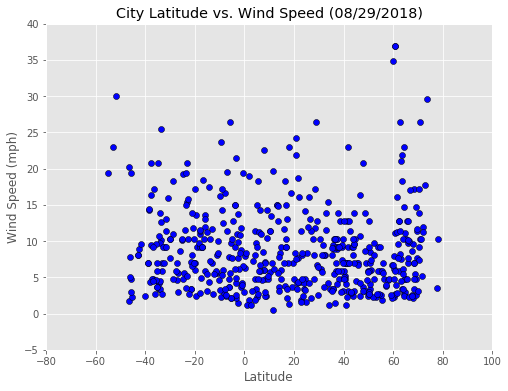

In [101]:
# Graph Wind Speed (mph) vs. Latitude
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(weather_data["Latitude"],
           weather_data["Wind Speed (mph)"],
           marker = "o",
           facecolors = "blue",
           edgecolors = "black")

plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.title("City Latitude vs. Wind Speed (08/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.style.use('ggplot')

plt.savefig("./Images/Wind_Speed.png")